In [1]:
import tensorflow as tf 
import numpy as np
import csv 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [2]:
#cargo datos
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()
largo = train_images.shape[0]

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
text_labels = []
labels = ['cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve']
for i in np.arange(np.size(train_labels)):
  text_labels.append(labels[train_labels[i]])

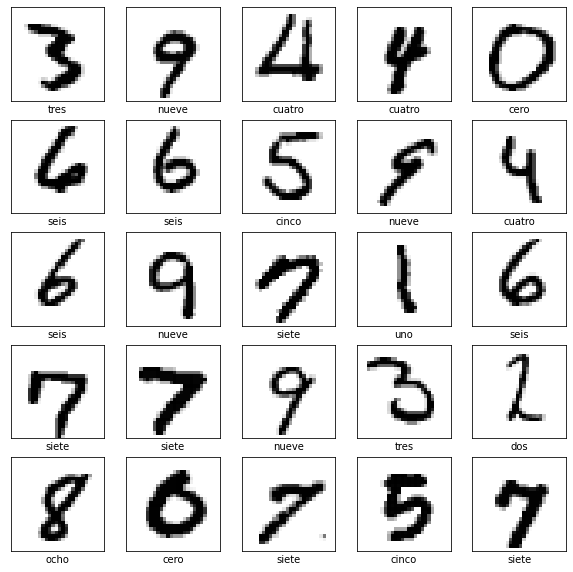

In [4]:
#visualizo datos de forma aleatoria.

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(text_labels[img_index])


In [5]:
imagenes = []
for x in np.arange(60000):
  imagenes.append(train_images[x].reshape(1,28*28))
varianza = np.var(imagenes, axis = 0)
mask = np.where(varianza == 0)
filtro = mask[1]
imagenes_filtradas = []
for y in np.arange(60000):
  imagenes_filtradas.append(np.delete(imagenes[y], filtro, axis = 1))

In [6]:
#normalizo datos
sigma = np.std(imagenes_filtradas, axis = 0)
mu = np.mean(imagenes_filtradas, axis = 0)
imagenes_filtradas = (imagenes_filtradas - mu)/sigma   
imagenes_filtradas = imagenes_filtradas.reshape(60000,717)         

In [7]:
#modelo de entrenmiento
model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(10, input_dim=np.shape(imagenes_filtradas)[1])) #dense(numero de clases a clasificar, dimension del input)
model.summary() 
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1) 
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = 'accuracy') 
hist = model.fit(x= imagenes_filtradas, y= train_labels, batch_size = largo, epochs=2000, callbacks=[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7180      
                                                                 
Total params: 7,180
Trainable params: 7,180
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 2.8821 - accuracy: 0.1174
Epoch 2/2000
1/1 [==============================] - 0s 79ms/step - loss: 2.7926 - accuracy: 0.1294
Epoch 3/2000
1/1 [==============================] - 0s 83ms/step - loss: 2.7065 - accuracy: 0.1415
Epoch 4/2000
1/1 [==============================] - 0s 123ms/step - loss: 2.6239 - accuracy: 0.1541
Epoch 5/2000
1/1 [==============================] - 0s 71ms/step - loss: 2.5447 - accuracy: 0.1691
Epoch 6/2000
1/1 [==============================] - 0s 77ms/step - loss: 2.4691 - accura

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.94      0.98      0.96      1135
           2       0.92      0.87      0.89      1032
           3       0.89      0.90      0.89      1010
           4       0.89      0.94      0.91       982
           5       0.88      0.85      0.86       892
           6       0.93      0.93      0.93       958
           7       0.90      0.91      0.90      1028
           8       0.88      0.84      0.86       974
           9       0.89      0.87      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



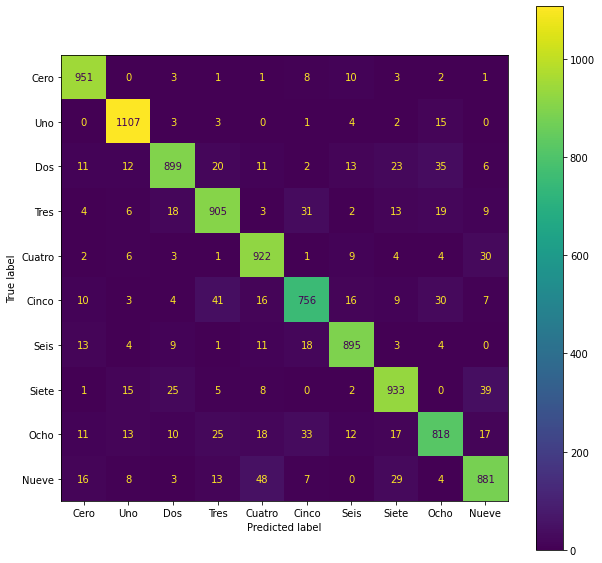

In [54]:
#confusion matrix

def test_images_normalized(train_images, filter):
  imagenes = []
  largo = np.shape(train_images)[0]
  for x in np.arange(largo):
    imagenes.append(train_images[x].reshape(1,28*28))
  imagenes_filtradas = []
  for y in np.arange(largo):
    imagenes_filtradas.append(np.delete(imagenes[y], filter, axis = 1))
  
  sigma = np.std(imagenes_filtradas, axis = 0)
  mu = np.mean(imagenes_filtradas, axis = 0)
  imagenes_filtradas = (imagenes_filtradas - mu)/sigma   
  imagenes_filtradas = imagenes_filtradas.reshape(largo,717)
  np.nan_to_num(imagenes_filtradas, copy=False, nan=0.0)
  return imagenes_filtradas 

imagenes_prueba = test_images_normalized(test_images, filtro)
valores_estimados = model.predict(imagenes_prueba)

resultados_estimados = []
largo = np.shape(valores_estimados)[0]
for i in np.arange(largo):
  resultados_estimados.append(np.argmax(valores_estimados[i]))

def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,display_labels=["Cero", "Uno","Dos","Tres","Cuatro", "Cinco", "Seis", "Siete", "Ocho", "Nueve"],ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))

show_results(test_labels,resultados_estimados)
